In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

from glob import glob

import seaborn as sns

In [3]:
a = glob('./data/CropWajah/Anti/Anti/*.png')
b = glob('./data/CropWajah/Dewi/Dewi/*.png')
c = glob('./data/CropWajah/Hoky/Hoky/*.png')
d = glob('./data/CropWajah/Raihan/Raihan/*.png')
e = glob('./data/CropWajah/Rani/Rani/*.png')

In [4]:
len(a),len(b),len(c),len(d),len(e)

(71, 41, 93, 54, 21)

In [7]:
path = a+b+c+d+e
len(path)

280

In [8]:
df = pd.DataFrame(data=path,columns=['path'])
df.head()

,path
0,./data/CropWajah/Anti/Anti\anti.png
1,./data/CropWajah/Anti/Anti\anti1.png
2,./data/CropWajah/Anti/Anti\anti10.png
3,./data/CropWajah/Anti/Anti\anti11.png
4,./data/CropWajah/Anti/Anti\anti17.png


In [9]:
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [10]:
df['size'] = df['path'].apply(getSize)
df.tail()

,path,size
275,./data/CropWajah/Rani/Rani\Rani86.png,122
276,./data/CropWajah/Rani/Rani\Rani88.png,273
277,./data/CropWajah/Rani/Rani\Rani89.png,122
278,./data/CropWajah/Rani/Rani\Rani95.png,122
279,./data/CropWajah/Rani/Rani\Rani96.png,122


# EDA

In [11]:
df.describe()

,size
count,280.000000
mean,232.596429
std,79.625814
min,54.000000
25%,182.000000
50%,273.000000
75%,273.000000
max,410.000000


<AxesSubplot:>

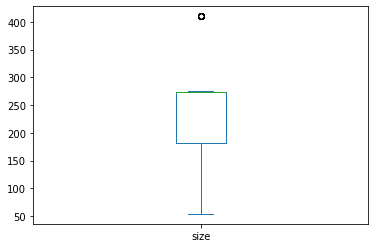

In [13]:
df['size'].plot(kind='box')

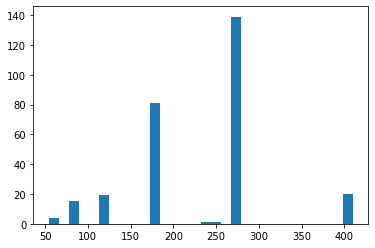

In [14]:
plt.hist(df['size'],bins=30)
plt.show()

In [ ]:
#resize all the image in 100 x 100

In [20]:
string = df['path'][0]
def objek(string):
    try:

        return string.split('/')[-2]
    except:
        return None

In [21]:
df['objek'] = df['path'].apply(objek)

Hoky      0.332143
Anti      0.253571
Raihan    0.192857
Dewi      0.146429
Rani      0.075000
Name: objek, dtype: float64


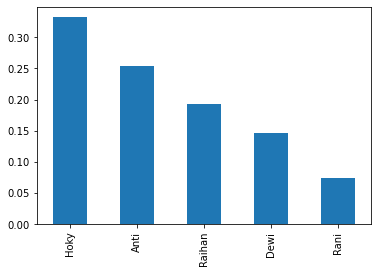

In [22]:
print(df['objek'].value_counts(normalize=True))
df['objek'].value_counts(normalize=True).plot(kind='bar')
plt.show()

# Resize Image

In [23]:
def resize_img(path_to_resize):
    try:

        # step - 1: read image
        img = cv2.imread(path_to_resize)
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 100 x 100 array
        size = gray.shape[0]
        if size >= 100: #shrink
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) # SHRINK
        else: # enlarge
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) # ENLARGE
        # step -4: Flatten Image (1x10,000)
        return gray_re.flatten()
    except:
        return None

In [24]:
len(resize_img(path[0]))

10000

In [26]:
df['objek'] = df['path'].apply(objek)
df.head()

,path,size,objek
0,./data/CropWajah/Anti/Anti\anti.png,273,Anti
1,./data/CropWajah/Anti/Anti\anti1.png,273,Anti
2,./data/CropWajah/Anti/Anti\anti10.png,54,Anti
3,./data/CropWajah/Anti/Anti\anti11.png,122,Anti
4,./data/CropWajah/Anti/Anti\anti17.png,273,Anti


In [27]:
df['structure_data'] = df['path'].apply(resize_img)

In [29]:
df1 = df['structure_data'].apply(pd.Series)

In [31]:
df2 = pd.concat((df['objek'],df1),axis=1)

In [32]:
df2.head()

,objek,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Anti,0,0,0,0,0,0,0,0,0,...,82,81,89,127,140,146,136,132,147,132
1,Anti,0,0,0,0,0,0,0,0,0,...,69,84,143,83,38,29,37,42,101,48
2,Anti,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anti,0,0,0,0,0,0,0,0,0,...,6,7,7,8,9,10,11,12,13,1
4,Anti,0,0,0,0,0,0,0,0,0,...,67,64,56,62,77,79,75,79,87,76


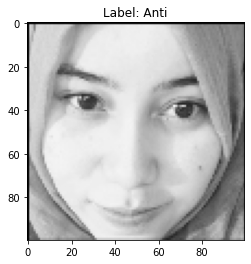

In [33]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: "+df2.loc[0]['objek'])
plt.show()

In [34]:
import pickle
pickle.dump(df2,open('./data/df_images_100x100.pickle','wb'))

In [35]:
new_df=pickle.load(open('./data/df_images_100x100.pickle','rb'))

In [37]:
new_df.tail()

,objek,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
275,Rani,0,0,0,0,0,0,0,0,0,...,4,4,5,5,5,5,5,5,5,1
276,Rani,0,0,0,0,0,0,0,0,0,...,46,48,39,40,41,45,64,71,74,69
277,Rani,0,0,0,0,0,0,0,0,0,...,14,15,15,14,13,14,14,15,15,2
278,Rani,0,0,0,0,0,0,0,0,0,...,8,4,4,5,6,7,6,3,2,0
279,Rani,0,0,0,0,0,0,0,0,0,...,17,17,13,6,4,3,5,4,4,0


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 10001 entries, objek to 9999
dtypes: object(1), uint8(10000)
memory usage: 2.7+ MB


In [43]:
new_df.isnull().sum()

objek    0
0        0
1        0
2        0
3        0
        ..
9995     0
9996     0
9997     0
9998     0
9999     0
Length: 10001, dtype: int64

# Normalization

In [45]:
X = new_df.iloc[:,1:].values # inpendent features
y = new_df.iloc[:,0].values # dependent

In [46]:
X.shape

(280, 10000)

In [47]:
X.min() , X.max()

(0, 255)

In [48]:
Xnorm = X / X.max()

In [49]:
Xnorm

array([[0.        , 0.        , 0.        , ..., 0.51764706, 0.57647059,
        0.51764706],
       [0.        , 0.        , 0.        , ..., 0.16470588, 0.39607843,
        0.18823529],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05882353, 0.05882353,
        0.00784314],
       [0.        , 0.        , 0.        , ..., 0.01176471, 0.00784314,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01568627, 0.01568627,
        0.        ]])

In [50]:
Xnorm.shape

(280, 10000)

In [51]:
X

array([[  0,   0,   0, ..., 132, 147, 132],
       [  0,   0,   0, ...,  42, 101,  48],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  15,  15,   2],
       [  0,   0,   0, ...,   3,   2,   0],
       [  0,   0,   0, ...,   4,   4,   0]], dtype=uint8)

In [54]:
condition = [
    (y=='Anti'),
    (y=='Dewi'),
    (y=='Hoky'),
    (y=='Raihan'),
    (y=='Rani')]
choices = [1,2,3,4,5]
y_norm = np.select(condition, choices, default=5)
y_norm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [55]:
new_df['kode_objek']=np.select(condition, choices, default='5')

new_df

,objek,0,1,2,3,4,5,6,7,8,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,kode_objek
0,Anti,0,0,0,0,0,0,0,0,0,...,81,89,127,140,146,136,132,147,132,1
1,Anti,0,0,0,0,0,0,0,0,0,...,84,143,83,38,29,37,42,101,48,1
2,Anti,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Anti,0,0,0,0,0,0,0,0,0,...,7,7,8,9,10,11,12,13,1,1
4,Anti,0,0,0,0,0,0,0,0,0,...,64,56,62,77,79,75,79,87,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Rani,0,0,0,0,0,0,0,0,0,...,4,5,5,5,5,5,5,5,1,5
276,Rani,0,0,0,0,0,0,0,0,0,...,48,39,40,41,45,64,71,74,69,5
277,Rani,0,0,0,0,0,0,0,0,0,...,15,15,14,13,14,14,15,15,2,5
278,Rani,0,0,0,0,0,0,0,0,0,...,4,4,5,6,7,6,3,2,0,5


In [56]:
np.savez('./data/data_norm.npz',Xnorm,y_norm)